In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import StratifiedShuffleSplit

# 1. Image Classification

<b>(a) Task: You are given a dataset of eye images divided into three folders namely, Open, Partially Closed and
Closed which constitute the labels (y) for the images. This dataset is a modified version of the original
dataset from the github repository: https://github.com/hamzahsaleem/eye-blink-detection. Perform
multiclass classification using any technique of your choice, which you have learned till now in the machine
learning course, to classify the eye images into open, partially closed or closed. Submission has to be as
following:</b>

<b>i. (1 point) Correct code which we will be able to run.</b>

In [2]:
def load_files(container_path, dimension=(64, 64)):
    
    path = Path(container_path)
    
    # this will contain path of every folder
    folders=[]
    for item in path.iterdir():
        if item.is_dir():
            folders.append(item)
    
    # this will store the folder names which is the category
    labels=[]
    for i in folders:
        labels.append(i.name)
    
    # this will store the image in array form
    images_arr = []
    
    # this will store the image data into 1 D array and we will use flatten() to perform this task
    flat_data_arr = []
    
    # this will contain target value for an image
    target_arr = []
    
    # enumerating in the folders
    for i, j in enumerate(folders):
        for k in j.iterdir():
            # reading the image
            img = imread(k)
            # resizing the image
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            # flattening the image
            flat_data_arr.append(img_resized.flatten()) 
            # appending the data in the respective lists
            images_arr.append(img_resized)
            target_arr.append(i)
    
    # converting all array into numpy array
    flat_data = np.array(flat_data_arr)
    target = np.array(target_arr)
    images = np.array(images_arr)
    
    return Bunch(data=flat_data,
                 target=target,
                 target_names=labels,
                 images=images)

In [3]:
# calling the function created above
dataset= load_files("data/")

In [4]:
# splitting the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.3,random_state=100)

<b>ii. (1 point) Apply a technique to find out the best generalization accuracy and report it.</b>

In [5]:
# parameters for which gridCV will run
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# using grid serch cross validation technique for finding the best hyperparameters
svc = svm.SVC()
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
clf = GridSearchCV(svc, param_grid,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [6]:
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 1, 'kernel': 'linear'} with a score of 0.95


In [7]:
# predicting for test dataset
y_pred = clf.predict(X_test)

In [8]:
# predicting the accuracy score
clf.score(X_test,y_test)

0.9259259259259259

<b>iii. (2 points) Write a Text section in a separate text block describing what you have done and why.</b>

The Whole process is divided into five parts:-
<br><br>
<b>1) Loading the Data</b>
Fist i stored the path of each folder in an array. Then saved the name of these folders in an array because that defines the category of the data. Then enumerating within the folders to store the images by outputting the values in three arrays, first category in which the image belong, second, the conversion of image into numpy array and third is the flattening of the image array into 1 D. Then i converted all formed arrays into numpy arrays and stored all of them in a Bunch.
<br>
<br>
<b>2) Splitting the Data</b>
with the help of train test split method i splitted the data into train and test part with test size of 0.3.
<br>
<br>
<b>3) Tuning Hyperparameters and Training the model</b>
Created a parameter grid from which GridSearcgCV will find the best hyperparameters for the model and training the model over these hyperparameters. Then, i also printed what are the best parameters and best score for the model.
<br>
<br>
<b>4) Predicting over test Data</b>
predicting the values for test data we created in step 2.
<br><br>
<b>5) Finding Accuracy</b>
Printing the accuracy for the test data

<b>iv. (1 point) Generate a figure containing the misclassified images and write down your observations in the
text block regarding why these images were misclassified.</b>

In [9]:
# showing confusion matrix for the test data
metrics.confusion_matrix(y_test,y_pred)

array([[ 6,  0,  2],
       [ 0, 25,  0],
       [ 1,  1, 19]], dtype=int64)

In [10]:
# finding which indexes are not predicted correctly

# this will store all the mismatched  indices
index=[]

# which will count the indices number
c=0

# checking for corresponding values in actual and predicted one
for i,j in zip(y_test,y_pred):
    if i!=j:
        index.append(c)
    c+=1
print(index)

[12, 40, 45, 50]


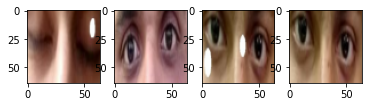

In [11]:
# plotting all  images in one figure
fig=plt.figure()

# creating subplot
ax=fig.add_subplot(1,4,1)
# showing image
plt.imshow(dataset['images'][12])

# creating subplot
ax=fig.add_subplot(1,4,2)
# showing image
plt.imshow(dataset['images'][40])

# creating subplot
ax=fig.add_subplot(1,4,3)
# showing image
plt.imshow(dataset['images'][45])

# creating subplot
ax=fig.add_subplot(1,4,4)
# showing image
plt.imshow(dataset['images'][50])
plt.show()

<b>OBSERVATIONS :-</b>
<br><br>
With the help of confusion matrix we can easily see that 4 images are not matched correctly as non diagonal values sum is equal to 4. The reason for classification is the pixel difference between the images you can see there are white spots in the images due to which these images are not classified properly.

# 2. Multivariate Time Series Forecasting

<b>(a) Task: You are provided with a Multivariate time series data containing observations for 400 timestamps.
Each column in data file corresponds to one timestamp with 5 observations (corresponding to 5 variables/dimensions). Read this multivariate time series data and predict the future possible observations for
100 timestamps, using any of the suitable machine learning model you have learnt in this machine learning
course. Evaluation scheme will be as follows:<br>

<b>i. (1.5 point) Correct code which we will be able to run (do not include code parts which are not relevant
for the task).</b>

In [12]:
# reading the dataset
df=pd.read_csv('Timeseriesdata.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,5.02660,1.1865,1.5958,-3.10860,-2.0905,-0.91498,-1.94710,0.15966,2.14240,0.056887,...,-8.0035,-8.1098,-8.5255,-7.8608,-7.7246,-9.1607,-6.8131,-6.1857,-7.3530,-8.5236
1,0.10983,4.2070,2.6693,-0.64083,-3.5149,-1.63800,1.76190,3.39830,4.71010,4.372700,...,7.5324,6.0191,4.6289,4.4797,5.9191,7.1107,7.1490,9.4892,7.7197,8.3973
2,-1.60530,-2.7818,4.2074,0.93778,2.2189,-0.71185,-0.55037,1.76030,2.12600,2.449500,...,18.3750,16.3030,17.9720,16.6840,16.4000,15.2720,16.5030,16.9020,17.4670,19.1400
3,-0.77477,1.5173,1.3041,-0.58611,-2.8555,-1.51640,-2.02340,-0.67315,0.72057,1.296400,...,-7.1182,-6.4652,-8.5818,-10.4780,-10.1730,-8.1731,-9.1686,-6.6100,-6.9066,-7.5819
4,-0.68364,4.9704,-2.8531,-2.53620,-2.3146,-1.85110,-2.33510,-1.05430,-1.34160,-4.588200,...,-21.9440,-23.3420,-23.4890,-25.7040,-23.1260,-20.5420,-23.2400,-23.4830,-24.8770,-24.7950


In [13]:
# transposing the dataset
df=df.T
df.head()

,0,1,2,3,4
0,5.0266,0.10983,-1.60530,-0.77477,-0.68364
1,1.1865,4.20700,-2.78180,1.51730,4.97040
2,1.5958,2.66930,4.20740,1.30410,-2.85310
3,-3.1086,-0.64083,0.93778,-0.58611,-2.53620
4,-2.0905,-3.51490,2.21890,-2.85550,-2.31460


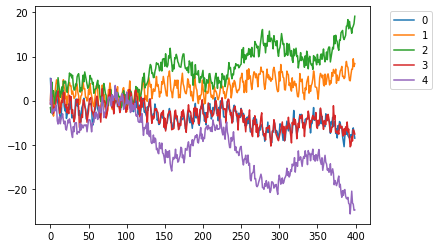

In [14]:
# plotting the data to see the trend
df.plot(kind='line')
plt.legend(loc='upper right',bbox_to_anchor = (1.2, 1))

In [15]:
# taking last 100 obervations for test and rest for train
n_obs=5
df_train,df_test=df[:-n_obs],df[-n_obs:]

In [16]:
from statsmodels.tsa.stattools import adfuller

# performing Augumented Dickey Fuller test for checking is fata have non stationary series or not
# if present we have to remove with differencing

# defining the function which take time series
def adf_test(timeSeries, signif=0.05):
    print("-"*40)
    
    # adf mainly depends on five parameters which are namely test statistic, p-value,no of lags used,numer of observations,critical values
    dftest = adfuller(timeSeries, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    
    # printing the critical values at 1%, 5% and 10%
    for key,value in dftest[4].items():
        adf['Critical Value (%s)'%key] = value
    print (adf)
    
    # printing is series is stationary or not
    p = adf['p-value']
    if p <= signif:
        print(" Series is Stationary")
    else:
        print(" Series is Non-Stationary")

        
#apply adf test on the all series
adf_test(df_train[0])
adf_test(df_train[1])
adf_test(df_train[2])
adf_test(df_train[3])
adf_test(df_train[4])

----------------------------------------
Test Statistic           -1.058673
p-value                   0.731268
# Lags                   15.000000
# Observations          379.000000
Critical Value (1%)      -3.447722
Critical Value (5%)      -2.869196
Critical Value (10%)     -2.570849
dtype: float64
 Series is Non-Stationary
----------------------------------------
Test Statistic           -0.091824
p-value                   0.950247
# Lags                   16.000000
# Observations          378.000000
Critical Value (1%)      -3.447769
Critical Value (5%)      -2.869217
Critical Value (10%)     -2.570860
dtype: float64
 Series is Non-Stationary
----------------------------------------
Test Statistic           -0.763385
p-value                   0.829642
# Lags                   13.000000
# Observations          381.000000
Critical Value (1%)      -3.447631
Critical Value (5%)      -2.869156
Critical Value (10%)     -2.570827
dtype: float64
 Series is Non-Stationary
-------------------

In [17]:
# from the above output we can see there are non stationary series
# we have to convert them into stationary series so we will differencing the series

# STATIONARY SERIES IS ONE IN WHICH MEAN AND VARIANCE DON'T CHANGE WITH TIME

df_differenced = df_train.diff().dropna()

# running adf test again to check for non stationary points
adf_test(df_differenced[0])
adf_test(df_differenced[1])
adf_test(df_differenced[2])
adf_test(df_differenced[3])
adf_test(df_differenced[4])

----------------------------------------
Test Statistic           -5.235252
p-value                   0.000007
# Lags                   16.000000
# Observations          377.000000
Critical Value (1%)      -3.447815
Critical Value (5%)      -2.869237
Critical Value (10%)     -2.570870
dtype: float64
 Series is Stationary
----------------------------------------
Test Statistic         -7.954528e+00
p-value                 3.062458e-12
# Lags                  1.500000e+01
# Observations          3.780000e+02
Critical Value (1%)    -3.447769e+00
Critical Value (5%)    -2.869217e+00
Critical Value (10%)   -2.570860e+00
dtype: float64
 Series is Stationary
----------------------------------------
Test Statistic           -3.287922
p-value                   0.015427
# Lags                   12.000000
# Observations          381.000000
Critical Value (1%)      -3.447631
Critical Value (5%)      -2.869156
Critical Value (10%)     -2.570827
dtype: float64
 Series is Stationary
-----------------

In [18]:
# form the above output we can see column 4 still is non stationary series
# so we have to perform differencing afafin in order to convert it to stationary
df_differenced2=df_differenced.diff().dropna()


# running adf test again to check if non stationary points are still there
adf_test(df_differenced2[0])
adf_test(df_differenced2[1])
adf_test(df_differenced2[2])
adf_test(df_differenced2[3])
adf_test(df_differenced2[4])

----------------------------------------
Test Statistic         -9.213707e+00
p-value                 1.858099e-15
# Lags                  1.700000e+01
# Observations          3.750000e+02
Critical Value (1%)    -3.447909e+00
Critical Value (5%)    -2.869278e+00
Critical Value (10%)   -2.570892e+00
dtype: float64
 Series is Stationary
----------------------------------------
Test Statistic         -1.167761e+01
p-value                 1.772602e-21
# Lags                  1.700000e+01
# Observations          3.750000e+02
Critical Value (1%)    -3.447909e+00
Critical Value (5%)    -2.869278e+00
Critical Value (10%)   -2.570892e+00
dtype: float64
 Series is Stationary
----------------------------------------
Test Statistic         -9.954508e+00
p-value                 2.464516e-17
# Lags                  1.700000e+01
# Observations          3.750000e+02
Critical Value (1%)    -3.447909e+00
Critical Value (5%)    -2.869278e+00
Critical Value (10%)   -2.570892e+00
dtype: float64
 Series is 

<AxesSubplot:>

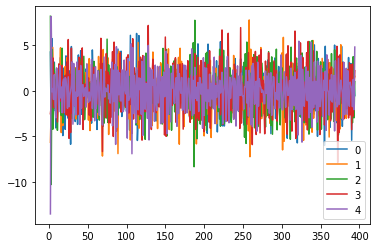

In [19]:
# from the above output we can see the there are no non stationaryy series left

# now let's see how our data is looking
df_differenced2.plot(kind='line')

In [20]:
# importing VAR model
from statsmodels.tsa.api import VAR

# intitalizing the model on differenced data
model=VAR(df_differenced2)

c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [21]:
# finding the optimum value of Lag order out of 100 lag values
maxi=float('inf')
arr=[i for i in range(1,101)]
for i in arr:
    result = model.fit(i)
    if result.aic>maxi:
        print('Lag Order :- ',i-1)
        break
    else:
        maxi=result.aic

Lag Order :-  13


In [22]:
# intializing the model
model=VAR(df_differenced2)

# training the model with optimized lag order
result=model.fit(maxlags=13,ic='aic')


c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [23]:
#storing the lag_order in a variable
lag_order=result.k_ar
lag_order

13

In [24]:
# forecasting the result for the test data created above using the differenced data
predicted=result.forecast(df_differenced2.values[-lag_order:],n_obs)

# storinng the result in a dataframe
forecast = pd.DataFrame(predicted, index = df.index[-n_obs:], columns = df.columns)
forecast.head()

,0,1,2,3,4
395,-0.214329,-0.147422,0.982339,0.809991,-3.974220
396,1.615374,-1.069359,0.506479,0.367822,2.133423
397,-1.770194,0.955451,-0.496322,-1.407233,-1.853036
398,0.588174,-1.504842,-0.052183,-0.128232,0.927017
399,-1.361492,-0.750104,0.066870,-0.977645,-0.827783


In [25]:
# we have forecasted using the diffferenced data but we have to convert that to normal data
# so we will invert the ttransformation

# defining the function for inverting transformation
def inverting_transform(df,forecast,diff_2):
    # for all columns in dataframe
    for col in df.columns:
        
        # if data is 2 differenced
        if diff_2:
            # invert back to 1 differenced 
            forecast[col]=(df[col].iloc[-1] - df[col].iloc[-2]) + forecast[col].cumsum()
        
        # converting 1 differenced to normal data
        forecast[col]=df[col].iloc[-1] + forecast[col].cumsum()
    
    # returning the normal data
    return forecast

In [26]:
# forcasted values after applying invert transformation method
forcasted_values=inverting_transform(df_train,forecast,diff_2=True)
forcasted_values.head()

,0,1,2,3,4
395,-7.802729,7.211078,17.098339,-9.058009,-24.522220
396,-6.265483,7.433697,18.303156,-7.575197,-23.785018
397,-6.498432,8.611767,19.011652,-7.499618,-24.900850
398,-6.143206,8.284994,19.667964,-7.552271,-25.089666
399,-7.149473,7.208117,20.391146,-8.582568,-26.106264


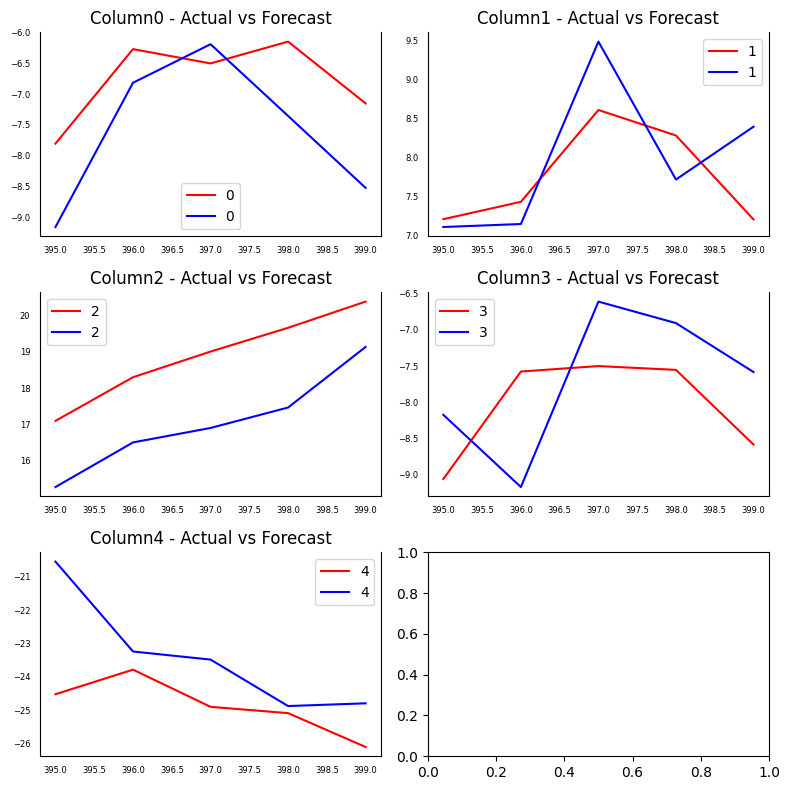

In [27]:
# SHOWING THE PREDICTED AND ACTUAL VALUES FOR EACH COLUMN

fig,axes = plt.subplots(nrows=3,ncols=2,dpi=100,figsize=(8,8))

for i,(col,ax) in enumerate(zip(df.columns,axes.flatten())):
    forcasted_values[col].plot(color = 'r', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    df_test[col].plot(color = 'b', legend = True, ax = ax)
    
    ax.set_title('Column' + str(col) + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.show()

In [28]:
mse1=metrics.mean_squared_error(df_test[0],forcasted_values[0])
print('MSE for column 0: ',mse1)

MSE for column 0:  1.1187193492251282


In [29]:
mse2=metrics.mean_squared_error(df_test[1],forcasted_values[1])
print('MSE for column 1: ',mse2)

MSE for column 1:  0.5189459893527173


In [30]:
mse3=metrics.mean_squared_error(df_test[2],forcasted_values[2])
print('MSE for column 2: ',mse3)

MSE for column 2:  3.4872627939688647


In [31]:
mse4=metrics.mean_squared_error(df_test[3],forcasted_values[3])
print('MSE for column 3: ',mse4)

MSE for column 3:  1.1063290124067222


In [32]:
mse5=metrics.mean_squared_error(df_test[4],forcasted_values[4])
print('MSE for column 4: ',mse5)

MSE for column 4:  3.9828275253940526


<b>iv. (1 point) Explain in a text block whether the task is supervised or unsupervised and why?; whether
there are any interdependencies among the 5 variables and if yes, then explain which interdependencies
you observed; how you chose the best hyperparameter value for the model, the criteria which you have
checked for hyperparameter selection.</b>

In [33]:
# performing all the same operations which we performed earlier to create this new model

adf_test(df[0])
adf_test(df[1])
adf_test(df[2])
adf_test(df[3])
adf_test(df[4])

----------------------------------------
Test Statistic           -0.778079
p-value                   0.825476
# Lags                   15.000000
# Observations          384.000000
Critical Value (1%)      -3.447495
Critical Value (5%)      -2.869096
Critical Value (10%)     -2.570795
dtype: float64
 Series is Non-Stationary
----------------------------------------
Test Statistic            0.173243
p-value                   0.970720
# Lags                   16.000000
# Observations          383.000000
Critical Value (1%)      -3.447540
Critical Value (5%)      -2.869116
Critical Value (10%)     -2.570806
dtype: float64
 Series is Non-Stationary
----------------------------------------
Test Statistic           -0.963777
p-value                   0.766246
# Lags                   13.000000
# Observations          386.000000
Critical Value (1%)      -3.447405
Critical Value (5%)      -2.869057
Critical Value (10%)     -2.570774
dtype: float64
 Series is Non-Stationary
-------------------

In [34]:
differenced = df.diff().dropna()

adf_test(differenced[0])
adf_test(differenced[1])
adf_test(differenced[2])
adf_test(differenced[3])
adf_test(differenced[4])

----------------------------------------
Test Statistic           -5.406283
p-value                   0.000003
# Lags                   14.000000
# Observations          384.000000
Critical Value (1%)      -3.447495
Critical Value (5%)      -2.869096
Critical Value (10%)     -2.570795
dtype: float64
 Series is Stationary
----------------------------------------
Test Statistic         -7.975174e+00
p-value                 2.714494e-12
# Lags                  1.500000e+01
# Observations          3.830000e+02
Critical Value (1%)    -3.447540e+00
Critical Value (5%)    -2.869116e+00
Critical Value (10%)   -2.570806e+00
dtype: float64
 Series is Stationary
----------------------------------------
Test Statistic           -3.484711
p-value                   0.008389
# Lags                   12.000000
# Observations          386.000000
Critical Value (1%)      -3.447405
Critical Value (5%)      -2.869057
Critical Value (10%)     -2.570774
dtype: float64
 Series is Stationary
-----------------

In [35]:
differenced2 = differenced.diff().dropna()

adf_test(differenced2[0])
adf_test(differenced2[1])
adf_test(differenced2[2])
adf_test(differenced2[3])
adf_test(differenced2[4])

----------------------------------------
Test Statistic         -9.659784e+00
p-value                 1.363261e-16
# Lags                  1.700000e+01
# Observations          3.800000e+02
Critical Value (1%)    -3.447676e+00
Critical Value (5%)    -2.869176e+00
Critical Value (10%)   -2.570838e+00
dtype: float64
 Series is Stationary
----------------------------------------
Test Statistic         -1.181390e+01
p-value                 8.729557e-22
# Lags                  1.700000e+01
# Observations          3.800000e+02
Critical Value (1%)    -3.447676e+00
Critical Value (5%)    -2.869176e+00
Critical Value (10%)   -2.570838e+00
dtype: float64
 Series is Stationary
----------------------------------------
Test Statistic         -9.954601e+00
p-value                 2.463182e-17
# Lags                  1.700000e+01
# Observations          3.800000e+02
Critical Value (1%)    -3.447676e+00
Critical Value (5%)    -2.869176e+00
Critical Value (10%)   -2.570838e+00
dtype: float64
 Series is 

In [36]:
# intializing the model
new_model=VAR(differenced2)

# training the model with optimized lag order
new_result=new_model.fit(maxlags=13,ic='aic')


c:\users\abhichal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [37]:
new_100=new_result.forecast(differenced2.values[-lag_order:],100)
new_100

array([[ 1.76876445e+00, -2.68048863e+00, -2.55914821e+00,
        -1.44782532e+00, -5.27621353e-01],
       [-2.19509527e+00,  1.19199859e+00,  2.58906589e-01,
         1.43188768e+00,  3.04072689e-01],
       [ 1.59698141e+00,  9.86005127e-01,  1.99220473e-01,
         8.05672955e-02,  3.20984019e-01],
       [ 6.40704194e-01, -7.03909203e-01, -5.00042371e-01,
         1.37679350e+00,  8.31032162e-01],
       [ 2.77287583e-01,  2.93020148e+00,  1.88212043e+00,
        -8.57555393e-01, -1.28840209e+00],
       [ 2.41651220e-01, -2.11871557e+00, -1.11687299e+00,
         2.00328826e+00,  5.12944219e-02],
       [-1.57237291e+00,  1.10479828e+00,  1.66830413e+00,
        -2.81960060e+00, -1.24552309e+00],
       [-4.03035928e-01, -1.80507530e+00, -1.04636345e+00,
         1.68777939e+00,  1.20714094e+00],
       [ 2.33333830e-01, -6.21225216e-01, -4.81220750e-01,
        -2.28284287e+00,  8.38383964e-02],
       [ 4.60140777e-03, -2.15107616e-01, -8.98407742e-02,
         6.53859562e-01

In [38]:
forecast_100 = pd.DataFrame(new_100, columns = df.columns)
forecast_100.head()

,0,1,2,3,4
0,1.768764,-2.680489,-2.559148,-1.447825,-0.527621
1,-2.195095,1.191999,0.258907,1.431888,0.304073
2,1.596981,0.986005,0.199220,0.080567,0.320984
3,0.640704,-0.703909,-0.500042,1.376794,0.831032
4,0.277288,2.930201,1.882120,-0.857555,-1.288402


In [39]:
forecast_values = inverting_transform(df, forecast_100, diff_2=True)
forecast_values.head()

,0,1,2,3,4
0,-7.925436,6.394411,18.253852,-9.705025,-25.240621
1,-9.522366,5.583521,17.626610,-10.396263,-25.382170
2,-9.522316,5.758636,17.198589,-11.006933,-25.202735
3,-8.881561,5.229842,16.270526,-10.240810,-24.192267
4,-7.963519,7.631250,17.224582,-10.332242,-24.470202


In [41]:
forecast_values.to_csv('Abhichal_Rajput_Prediction.csv',index=False)

<b>iv. (1 point) Explain in a text block whether the task is supervised or unsupervised and why?; whether
there are any interdependencies among the 5 variables and if yes, then explain which interdependencies
you observed; how you chose the best hyperparameter value for the model, the criteria which you have
checked for hyperparameter selection.</b>

In [42]:
df.corr()

,0,1,2,3,4
0,1.000000,-0.381424,-0.761634,0.859482,0.835841
1,-0.381424,1.000000,0.758855,-0.300472,-0.690519
2,-0.761634,0.758855,1.000000,-0.704730,-0.959444
3,0.859482,-0.300472,-0.704730,1.000000,0.805153
4,0.835841,-0.690519,-0.959444,0.805153,1.000000


<b>Observations:-</b>
<br><br>
1) I thought the task is supervised because we are given with the previous time series data and we have to predict the future outcomes based on that data.<br><br>2) As you can see from the above correlation table some variables are correlated to each other like 0 is related to 3 and 4 and 1 is related to 2.<br><br>3) I chose the best hyperparameter by performing training the model over multiple lag values and chose the best one with the criteria of AIC score.